Here we study the behaviour of the system when the controller is taken into account or not. 

The weather data used are the february ones. 

# Simulation : with a perfect controller 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dm4bem

We set the status of the controller to TRUE

In [2]:
controller = True
Kp = 1e3
explicit_Euler = True
imposed_time_step = False
Δt = 3600    # s, imposed time step   

# MODEL
# =====
# Thermal circuits
TC = dm4bem.file2TC('TC.csv', name='', auto_number=False)

# by default TC['G']['q11'] = 0 # Kp -> 0, no controller (free-floating
if controller:
    TC['G']['q11'] = Kp     # Kp -> ∞, almost perfect controller

# State-space
[As, Bs, Cs, Ds, us] = dm4bem.tc2ss(TC)

λ = np.linalg.eig(As)[0]    # eigenvalues of matrix As
dtmax = 2 * min(-1. / λ)    # max time step for Euler explicit stability
dt = dm4bem.round_time(dtmax)

if imposed_time_step:
    dt = Δt

### Input data
We use the input data, from February 1st to February 7th,  given by the file 'input_data_set.csv'.

In [3]:
input_data_set = pd.read_csv('input_data_set.csv',
                             index_col=0,
                             parse_dates=True)
input_data_set
input_data_set = input_data_set.resample(
    str(dt) + 'S').interpolate(method='linear')
input_data_set.head()
# Input vector in time from input_data_set
u = dm4bem.inputs_in_time(us, input_data_set)
u.head()


,q0,q8,q10,q11,θ0,θ4,θ6,θ7
2000-02-01 12:00:00+01:00,4.600000,4.600000,4.600000,20.0,1256.850000,62.842500,0.0,318.402000
2000-02-01 12:00:50+01:00,4.604167,4.604167,4.604167,20.0,1272.500156,63.625008,0.0,322.366706
2000-02-01 12:01:40+01:00,4.608333,4.608333,4.608333,20.0,1288.150311,64.407516,0.0,326.331412
2000-02-01 12:02:30+01:00,4.612500,4.612500,4.612500,20.0,1303.800467,65.190023,0.0,330.296118
2000-02-01 12:03:20+01:00,4.616667,4.616667,4.616667,20.0,1319.450622,65.972531,0.0,334.260824


In [4]:
# Initial conditions
θ0 = 20                     # °C, initial temperatures
θ = pd.DataFrame(index=u.index)
θ[As.columns] = θ0          # fill θ with initial valeus θ0
I = np.eye(As.shape[0])     # identity matrix

if explicit_Euler:
    for k in range(u.shape[0] - 1):
        θ.iloc[k + 1] = (I + dt * As) @ θ.iloc[k] + dt * Bs @ u.iloc[k]
else:
    for k in range(u.shape[0] - 1):
        θ.iloc[k + 1] = np.linalg.inv(
            I - dt * As) @ (θ.iloc[k] + dt * Bs @ u.iloc[k])
# outputs
y = (Cs @ θ.T + Ds @  u.T).T
Kp = TC['G']['q11']     # controller gain
S = 9                   # m², surface area of the toy house
q_HVAC = Kp * (u['q11'] - y['θ6']) / S  # W/m²
y['θ6']
data = pd.DataFrame({'To': input_data_set['To'],
                     'θi': y['θ6'],
                     'Etot': input_data_set['Etot'],
                     'q_HVAC': q_HVAC})

plt.show();
t = dt * np.arange(data.shape[0])   # time vector

### Visualisation of temperatures and heat flows

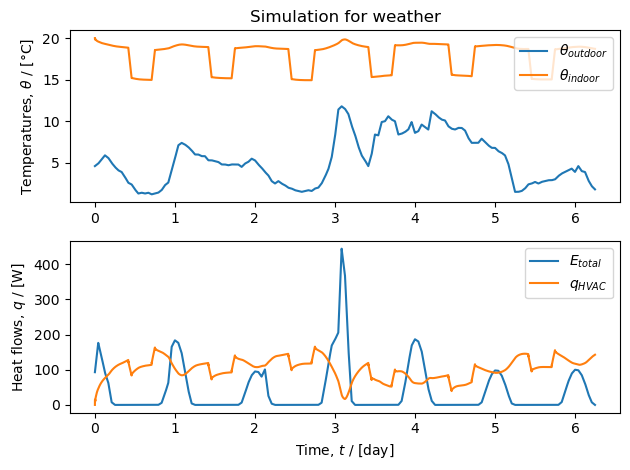

In [5]:
fig, axs = plt.subplots(2, 1)
# plot outdoor and indoor temperature
axs[0].plot(t / 3600 / 24, data['To'], label='$θ_{outdoor}$')
axs[0].plot(t / 3600 / 24, y.values, label='$θ_{indoor}$')
axs[0].set(ylabel='Temperatures, $θ$ / [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600 / 24, data['Etot'], label='$E_{total}$')
axs[1].plot(t / 3600 / 24, q_HVAC, label='$q_{HVAC}$')
axs[1].set(xlabel='Time, $t$ / [day]',
           ylabel='Heat flows, $q$ / [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()

# Simulation : without a perfect controller 
We change the status of the controller to FALSE

dt = 300 s = 5.0 min


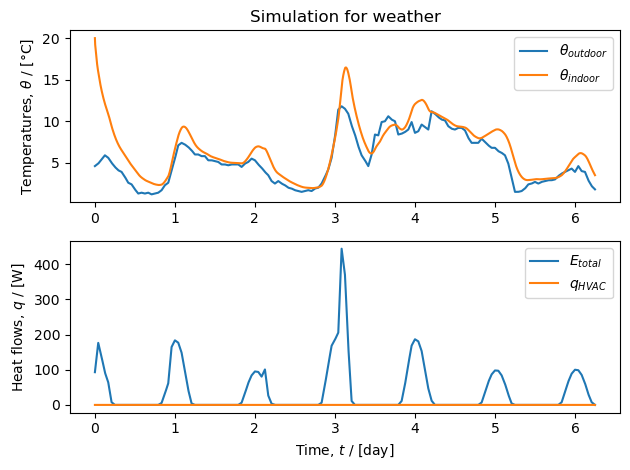

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dm4bem

controller = False
Kp = 1e3
explicit_Euler = True
imposed_time_step = False
Δt = 3600    # s, imposed time step   

# MODEL
# =====
# Thermal circuits
TC = dm4bem.file2TC('TC.csv', name='', auto_number=False)

# by default TC['G']['q11'] = 0 # Kp -> 0, no controller (free-floating
if controller:
    TC['G']['q11'] = Kp     # Kp -> ∞, almost perfect controller

# State-space
[As, Bs, Cs, Ds, us] = dm4bem.tc2ss(TC)

λ1 = np.linalg.eig(As)[0]    # eigenvalues of matrix As
dtmax1 = 2 * min(-1. / λ1)    # max time step for Euler explicit stability
dt1 = dm4bem.round_time(dtmax1)

if imposed_time_step:
    dt1 = Δt

dm4bem.print_rounded_time('dt', dt1)

# INPUT DATA SET
# ==============
input_data_set = pd.read_csv('input_data_set.csv',
                             index_col=0,
                             parse_dates=True)
input_data_set
input_data_set = input_data_set.resample(
    str(dt1) + 'S').interpolate(method='linear')
input_data_set.head()
# Input vector in time from input_data_set
u = dm4bem.inputs_in_time(us, input_data_set)
u.head()
# Initial conditions
θ0 = 20                     # °C, initial temperatures
θ1 = pd.DataFrame(index=u.index)
θ1[As.columns] = θ0          # fill θ with initial valeus θ0
I = np.eye(As.shape[0])     # identity matrix

if explicit_Euler:
    for k in range(u.shape[0] - 1):
        θ1.iloc[k + 1] = (I + dt1 * As) @ θ1.iloc[k] + dt1 * Bs @ u.iloc[k]
else:
    for k in range(u.shape[0] - 1):
        θ1.iloc[k + 1] = np.linalg.inv(
            I - dt1 * As) @ (θ1.iloc[k] + dt1 * Bs @ u.iloc[k])
# outputs
y1 = (Cs @ θ1.T + Ds @  u.T).T
Kp = TC['G']['q11']     # controller gain
S = 9                   # m², surface area of the toy house
q_HVAC1 = Kp * (u['q11'] - y1['θ6']) / S  # W/m²
y1['θ6']
data1 = pd.DataFrame({'To': input_data_set['To'],
                     'θi': y1['θ6'],
                     'Etot': input_data_set['Etot'],
                     'q_HVAC': q_HVAC1})

plt.show();
t1 = dt1 * np.arange(data1.shape[0])   # time vector

fig, axs = plt.subplots(2, 1)
# plot outdoor and indoor temperature
axs[0].plot(t1 / 3600 / 24, data1['To'], label='$θ_{outdoor}$')
axs[0].plot(t1 / 3600 / 24, y1.values, label='$θ_{indoor}$')
axs[0].set(ylabel='Temperatures, $θ$ / [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t1 / 3600 / 24, data1['Etot'], label='$E_{total}$')
axs[1].plot(t1 / 3600 / 24, q_HVAC1, label='$q_{HVAC}$')
axs[1].set(xlabel='Time, $t$ / [day]',
           ylabel='Heat flows, $q$ / [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()

# Comparaison of indoor temperatures and thermal loads

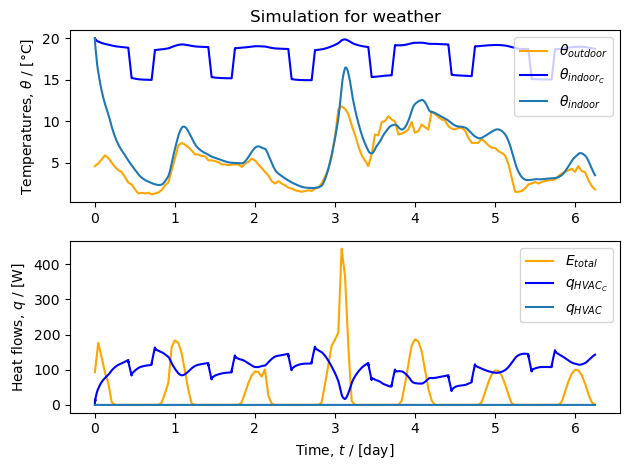

In [7]:
fig, axs = plt.subplots(2, 1)
# plot outdoor temperature
axs[0].plot(t / 3600 / 24, data['To'], label='$θ_{outdoor}$',color='orange')
# plot the indoor temperature with a controller
axs[0].plot(t / 3600 / 24, y.values, label='$θ_{indoor_C}$',color='blue')
# plot the indoor temperature without a controller
axs[0].plot(t1 / 3600 / 24, y1.values, label='$θ_{indoor}$')
axs[0].set(ylabel='Temperatures, $θ$ / [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600 / 24, data['Etot'], label='$E_{total}$',color='orange')
axs[1].plot(t / 3600 / 24, q_HVAC, label='$q_{HVAC_C}$',color='blue')
axs[1].plot(t1 / 3600 / 24, q_HVAC1, label='$q_{HVAC}$')

axs[1].set(xlabel='Time, $t$ / [day]',
           ylabel='Heat flows, $q$ / [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()

Analyse :

When the controller is not considered the indoor temperature follows the fluctuations of the outdoor temperature. Adding a controller permits to control indoor temperature : according to the first graph, the controller gives the possibility to reduce indoor temperature during the night and increase it during the day. It allows people to do energy savings. 

On the other hand, we can focus on the thermal load, qHVAC, which is the power that the HVAC system needs to deliver in order to maintain the indoor air temperature at its set-point, θ0 = 20°C. 
We are in february, so in winter implying qHVAC>0. It means that we have to heat to reach the indoor temperature.

According to the first model, with the controller, we observe that we need more power to maintain the indoor temperature constant, when the total solar irradiance is low. The more solar irradiance there is, the less heating we will need in winter.

Without a controller, the thermal load equals 0. It's logical since the indoor temperature is not controlled.

    

# Time steps

In [8]:
Mod1={'dt (s)':dt}
Mod2={'dt (s)':dt1}
pd.DataFrame.from_dict({'With perfect controller ':Mod1,
                        'Without perfect controller':Mod2},orient='index')

,dt (s)
With perfect controller,50.0
Without perfect controller,300.0


Analyse : 

Not considering the controller implies that the time step is larger. So the calculations are done at larger intervals. 